# Climate portfolio post

Your turn!

## Pick a new location and/or measurement to plot
🌏 📈

Recreate the workflow you just did in a place that interests you OR with
a different measurement. You will need to make your own new Markdown and
Code cells below this one, or create a new notebook.

Your analysis should include:

1.  A researched (with citations or links) **site description**,
    including *why* you chose the site
2.  A researched (with citations or links) **data description**,
    including a **data citation**
3.  A researched (with citations or links) **methods overview**
4.  Some kind of **visual evidence** (plot, chart, diagram) for your
    results
5.  A **headline and description** for the visual evidence that
    *interprets* your analysis and puts it *in context*

You should also delete the instructions before submitting a portfolio page.

To submit your portfolio post, we're going to do something a little different this week, to see if it is easier:

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

In [8]:
import pandas as pd
import holoviews as hv
import hvplot.pandas

In [3]:
# Reading in the data for New York City
NYclimatedataurl = ('https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USW00094789'
    '&startDate=1948-07-17'
    '&endDate=2024-09-20'
    '&units=standard')
NYclimatedataurl

#Converting to dataframe
snow_df = pd.read_csv(
    NYclimatedataurl,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
snow_df

,STATION,SNOW
DATE,,
1948-07-17,USW00094789,0.0
1948-07-18,USW00094789,0.0
1948-07-19,USW00094789,0.0
1948-07-20,USW00094789,0.0
1948-07-21,USW00094789,0.0
...,...,...
2024-09-16,USW00094789,0.0
2024-09-17,USW00094789,0.0
2024-09-18,USW00094789,0.0


<Axes: xlabel='DATE'>

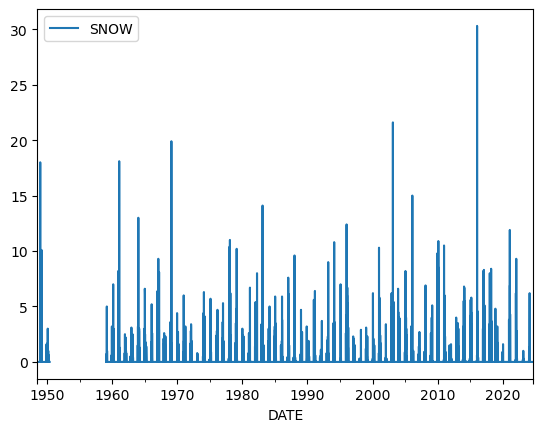

In [4]:
# Plotting annual snowfall at JFK airport
snow_df.plot()

Looks like the data set is missing data in the 1950s, so my next step should be to trim the dataset to remove those first years where there is missing data.

Stored 'snow_df2' (DataFrame)


<Axes: xlabel='DATE'>

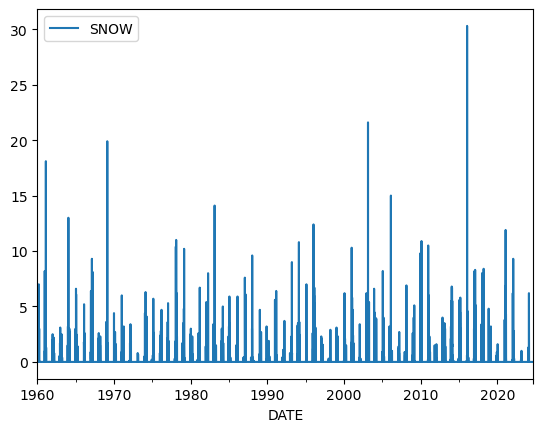

In [13]:
#Getting data from 1960-present
NYclimatedataurl2 = ('https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USW00094789'
    '&startDate=1960-01-01'
    '&endDate=2024-09-20'
    '&units=standard')
NYclimatedataurl2

#Converting to dataframe
snow_df2 = pd.read_csv(
    NYclimatedataurl2,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
snow_df2 = snow_df2[['SNOW']]

%store snow_df2

snow_df2.plot()

In [14]:
# Resampling data to get annual averages
ann_snow_df = snow_df2.resample('YS').mean()
%store ann_snow_df
ann_snow_df

Stored 'ann_snow_df' (DataFrame)


,SNOW
DATE,
1960-01-01,0.118956
1961-01-01,0.132418
1962-01-01,0.054247
1963-01-01,0.047802
1964-01-01,0.082787
...,...
2020-01-01,0.024863
2021-01-01,0.075342
2022-01-01,0.058904


<Axes: title={'center': 'Avg Annual Snowfall at JFK airport, NYC'}, xlabel='Year', ylabel='Avg Snowfall (unit?)'>

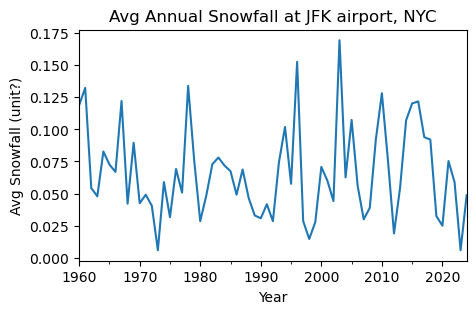

In [18]:
ann_snow_df.plot(
    y='SNOW',
    title='Avg Annual Snowfall at JFK airport, NYC',
    xlabel='Year',
    ylabel='Avg Snowfall (unit?)',
    figsize=(5,3),
    legend=False)